### Overview

We want to know if vote average, popularity, and profit margin are correlated with each other.

Using the TMDB Database, we first compared the vote average and popularity for movies between 2010 and 2020. We then used the TN Movie Budget Database to compare vote average and popularity with the profit margin.

### Datasets Analyzed
- TN movie budgets
- TMDB movies

# <font color='black'>What are the top 10 most popular and highest rated films? Is there a relationship between popularity and highest rated?</font>

### Import Necessary Libraries

In [1383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Import TMDB Movies Dataset

In [1349]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', 
                          compression='gzip', 
                          header=0, 
                          sep=',', 
                          quotechar='"', 
                          error_bad_lines=False, 
                          index_col=0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [1350]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


### Filtered dataset higher than 190 vote counts and movies for 2010 - 2020

We filtered for movies that had above the average vote count of 190 to exclude movies that have high voting averages with low vote counts. We analyzed only movies released in the past 10 years due to box office numbers being a lot lower in previous decades which may drag the average box office numbers down.

In [1351]:
#Find the average vote count for all movies in the past 10 years
tmdb_movies.loc[tmdb_movies['release_date'] > '2010-01-01'].describe()

,id,popularity,vote_average,vote_count
count,26022.00,26022.00,26022.00,26022.00
mean,298230.63,3.11,5.99,189.23
std,152145.89,4.32,1.85,943.80
min,189.00,0.60,0.00,1.00
25%,164657.75,0.60,5.00,2.00
50%,314128.00,1.38,6.00,5.00
75%,421398.25,3.68,7.00,28.00
max,608444.00,80.77,10.00,22186.00


In [1352]:
#filter the tmdb movies with vote count above 190 and release date after 2010
filtered_tmdb_movies = tmdb_movies.loc[(tmdb_movies['vote_count'] > 190) & 
                                       (tmdb_movies['release_date'] > '2010-01-01'), 
                                       ['original_title','popularity','vote_average','release_date']]
filtered_tmdb_movies.head()

,original_title,popularity,vote_average,release_date
0,Harry Potter and the Deathly Hallows: Part 1,33.53,7.70,2010-11-19
1,How to Train Your Dragon,28.73,7.70,2010-03-26
2,Iron Man 2,28.52,6.80,2010-05-07
4,Inception,27.92,8.30,2010-07-16
5,Percy Jackson & the Olympians: The Lightning T...,26.69,6.10,2010-02-11


### Removed Duplicates from Dataset

In [1353]:
#Find the total number of duplicates based on title
print('Number of Duplicates:', filtered_tmdb_movies['original_title'].duplicated().sum())

Number of Duplicates: 241


In [1354]:
#Drop duplicates
filtered_tmdb_movies.drop_duplicates(inplace=True)

#Check duplicates were dropped
print('Duplicates Remaining:', filtered_tmdb_movies.duplicated().sum())

Duplicates Remaining: 0


### Descriptive Statistics for Popularity & Vote Average

In [1355]:
filtered_tmdb_movies.describe()

,popularity,vote_average
count,2412.00,2412.00
mean,12.38,6.40
std,6.72,0.82
min,0.60,3.70
25%,8.24,5.90
50%,10.32,6.40
75%,14.38,7.00
max,80.77,8.60


### Top 10 Most Popular Movies 2010 - 2020

At a quick glance between the top 10 Popular Movies and top 10 Highly Rated Movies, not all of the movies are the same. We can assume that Popularity and Highly Rated will not have a strong positive correlation.

In [1356]:
top_10_popularity = filtered_tmdb_movies.loc[:,['original_title'
                                                ,'popularity']].sort_values(by='popularity',
                                                                            ascending=False).head(10)
display(top_10_popularity)

,original_title,popularity
23811,Avengers: Infinity War,80.77
11019,John Wick,78.12
23812,Spider-Man: Into the Spider-Verse,60.53
11020,The Hobbit: The Battle of the Five Armies,53.78
5179,The Avengers,50.29
11021,Guardians of the Galaxy,49.61
20617,Blade Runner 2049,48.57
23814,Fantastic Beasts: The Crimes of Grindelwald,48.51
23815,Ralph Breaks the Internet,48.06
20618,Spider-Man: Homecoming,46.77


Text(0.5, 0, 'Gross Profit (In Billions)')

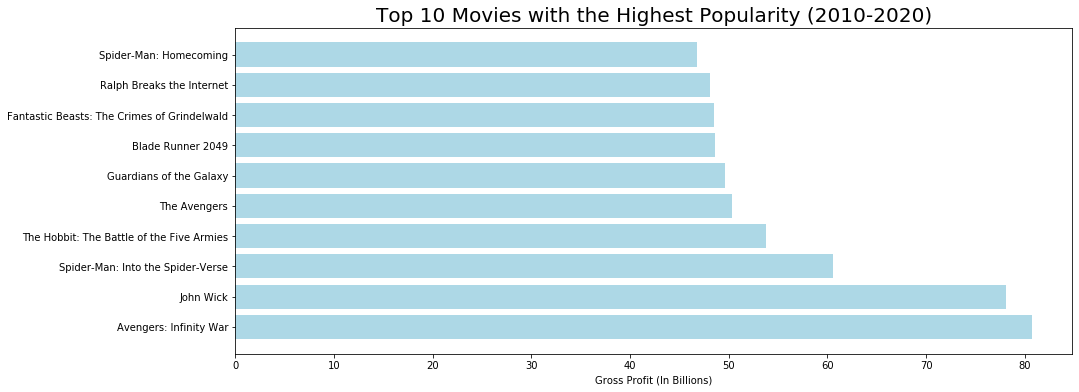

In [1357]:
plt.figure(figsize=(15,6))
plt.barh(top_10_popularity['original_title'],top_10_popularity['popularity'],color='lightblue')

plt.title('Top 10 Movies with the Highest Popularity (2010-2020)',fontsize=20)
plt.xlabel('Gross Profit (In Billions)')

### Top 10 Most Highly Rated Movies 2010 - 2020

In [1358]:
top_10_vote_average = filtered_tmdb_movies.loc[:,['original_title',
                                                  'vote_average']].sort_values(by='vote_average',
                                                                               ascending=False).head(10)
display(top_10_vote_average)

,original_title,vote_average
17389,君の名は。,8.60
11031,Whiplash,8.40
23899,کفرناحوم,8.40
23812,Spider-Man: Into the Spider-Verse,8.40
21008,In a Heartbeat,8.30
23827,Green Book,8.30
24056,Won't You Be My Neighbor?,8.30
17466,아가씨,8.30
11142,Mommy,8.30
23811,Avengers: Infinity War,8.30


Text(0.5, 0, 'Gross Profit (In Billions)')

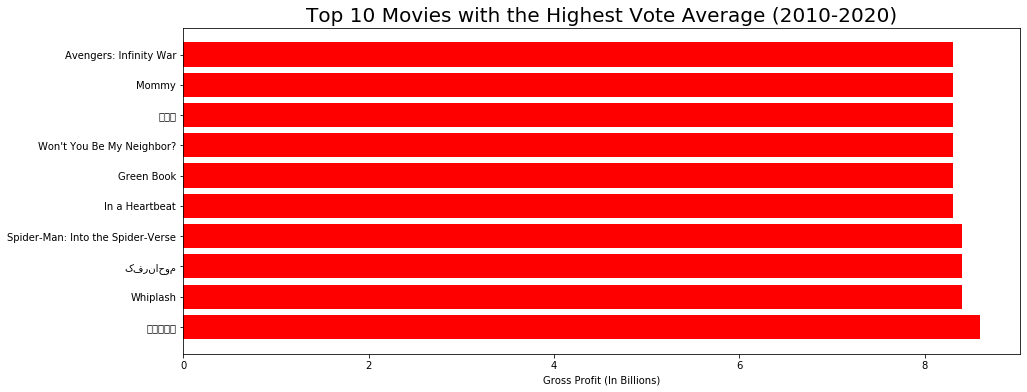

In [1359]:
plt.figure(figsize=(15,6))
plt.barh(top_10_vote_average['original_title'],top_10_vote_average['vote_average'],color='red')

plt.title('Top 10 Movies with the Highest Vote Average (2010-2020)',fontsize=20)
plt.xlabel('Gross Profit (In Billions)')

In [1360]:
## Subplots for Most Popular and Highly Rated Movies 2010-2020

# new_figure = plt.figure(figsize=(20,6))

# ax = new_figure.add_subplot(121)
# ax2 = new_figure.add_subplot(122)

# ax.barh(top_10_popularity['original_title'],top_10_popularity['popularity'] , color='lightblue')
# ax2.barh(top_10_vote_average['original_title'],top_10_vote_average['vote_average'], color='red')

# ax.set_xlim(0,100)
# ax.set_xlabel('Popularity',fontsize=15)
# ax.set_title('Top 10 Popular Movies (2010-2020)',fontsize=20)


# ax2.set_xlim(0,10)
# ax2.set_xlabel('Vote Average',fontsize=15)
# ax2.set_title('Top 10 Highest Rated Movies (2010-2020)',fontsize=20)

# plt.tight_layout()
# plt.show()

# <font color='black'>What are the top 10 movies with the highest gross profit margin? Is there a relationship between Popularity and Profit Margin?</font>

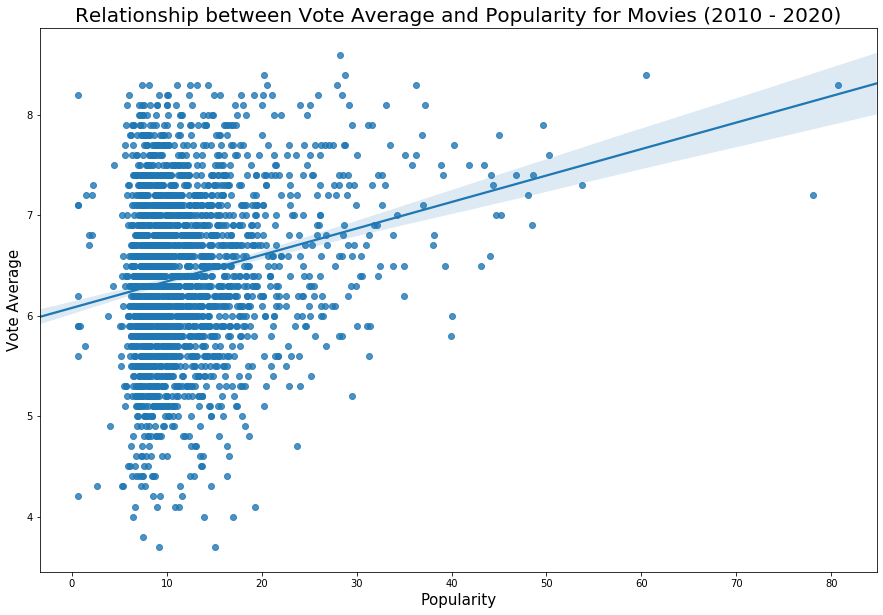

In [1361]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'black',
               'xtick.color':'black',
               'ytick.color':'black'})
plt.figure(figsize=(15,10))
sns.regplot(x='popularity',y='vote_average',data=filtered_tmdb_movies)
plt.title('Relationship between Vote Average and Popularity for Movies (2010 - 2020)',fontsize=20)
plt.xlabel('Popularity',fontsize=15)
plt.ylabel('Vote Average',fontsize=15)
plt.show()


In [1362]:
correlation = filtered_tmdb_movies['popularity'].corr(filtered_tmdb_movies['vote_average'])
correlation

0.21661176140359314

### Import The Numbers Movie Budget Dataset

In [1382]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', 
                               compression='gzip', 
                               header=0, 
                               sep=',', 
                               quotechar='"', 
                               error_bad_lines=False)

### Cleaning the Data

In [1364]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$','').str.replace(',','').astype({'production_budget': 'int64'})
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$','').str.replace(',','').astype({'domestic_gross': 'int64'})
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',','').astype({'worldwide_gross': 'int64'})


### Created New Column to Find the Gross Profit Margin

In [1365]:
tn_movie_budgets['gross_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


### Filtered Data to Release Date After 2010

In [1366]:
def change(x):
    return datetime.datetime.strptime(x,'%b %d %Y').strftime('%Y-%m-%d')

In [1367]:
tn_movie_budgets['release_date'] = tn_movie_budgets['release_date'].str.replace(',','').apply(change)
tn_movie_budgets = tn_movie_budgets.loc[tn_movie_budgets['release_date'] > '2010-01-01'] 

### Removed Duplicates

In [1368]:
#Find the total number of duplicates based on title
print('Number of Duplicates:', tn_movie_budgets['movie'].duplicated().sum())

Number of Duplicates: 4


In [1369]:
#Drop duplicates
tn_movie_budgets.drop_duplicates(inplace=True)

#Check duplicates were dropped
print('Duplicates Remaining:', tn_movie_budgets.duplicated().sum())

Duplicates Remaining: 0


### Merge the TMDB Database with TN Movie Budget Database

In [1370]:
merged_data = pd.merge(filtered_tmdb_movies, tn_movie_budgets, 
                how='inner', right_on=['movie','release_date'], left_on=['original_title','release_date'])

In [1371]:
#count of duplicates after joining
print('Number of Duplicates:', merged_data['original_title'].duplicated().sum())

Number of Duplicates: 1


In [1372]:
merged_data['original_title'].drop_duplicates(inplace=True)
print('Duplicates Remaining:', merged_data['original_title'].duplicated().sum())

Duplicates Remaining: 0


In [1373]:
merged_data.head()

,original_title,popularity,vote_average,release_date,id,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,How to Train Your Dragon,28.73,7.70,2010-03-26,30,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,Iron Man 2,28.52,6.80,2010-05-07,15,Iron Man 2,170000000,312433331,621156389,451156389
2,Inception,27.92,8.30,2010-07-16,38,Inception,160000000,292576195,835524642,675524642
3,Despicable Me,23.67,7.20,2010-07-09,50,Despicable Me,69000000,251513985,543464573,474464573
4,Alice in Wonderland,22.02,6.60,2010-03-05,51,Alice in Wonderland,200000000,334191110,1025491110,825491110


In [1374]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 10 columns):
original_title       1028 non-null object
popularity           1028 non-null float64
vote_average         1028 non-null float64
release_date         1028 non-null object
id                   1028 non-null int64
movie                1028 non-null object
production_budget    1028 non-null int64
domestic_gross       1028 non-null int64
worldwide_gross      1028 non-null int64
gross_profit         1028 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 88.3+ KB


### Descriptive Statistics for Vote Average and Gross Profit

In [1375]:
pd.options.display.float_format = '{:.2f}'.format
round(merged_data.describe(),2)

,popularity,vote_average,id,production_budget,domestic_gross,worldwide_gross,gross_profit
count,1028.00,1028.00,1028.00,1028.00,1028.00,1028.00,1028.00
mean,14.77,6.38,51.19,52724594.02,67428142.50,170679620.70,117955026.68
std,7.98,0.78,28.73,58664335.25,90496828.26,250969660.03,208448622.84
min,0.60,4.00,1.00,100000.00,0.00,0.00,-110450242.00
25%,9.61,5.90,26.75,12575000.00,14098195.50,25586094.50,5660857.50
50%,12.78,6.40,51.00,30000000.00,37536535.50,77127940.50,41992603.00
75%,17.27,6.90,77.00,68250000.00,79929883.75,197523215.00,128998065.00
max,80.77,8.40,100.00,410600000.00,700059566.00,2048134200.00,1748134200.00


### Top 20 Profit Margin Movies (2010-2020)

In [1376]:
top_10_grossprofit = merged_data.loc[:,['original_title',
                                        'gross_profit']].sort_values(by='gross_profit',
                                                                     ascending=False).head(10)
top_10_grossprofit.head(10)

,original_title,gross_profit
929,Avengers: Infinity War,1748134200
580,Jurassic World,1433854864
583,Furious 7,1328722794
222,The Avengers,1292935897
932,Black Panther,1148258224
941,Jurassic World: Fallen Kingdom,1135772799
830,Beauty and the Beast,1099199706
655,Minions,1086336173
563,Avengers: Age of Ultron,1072413963
939,Incredibles 2,1042520711


Text(0.5, 0, 'Gross Profit (In Billions)')

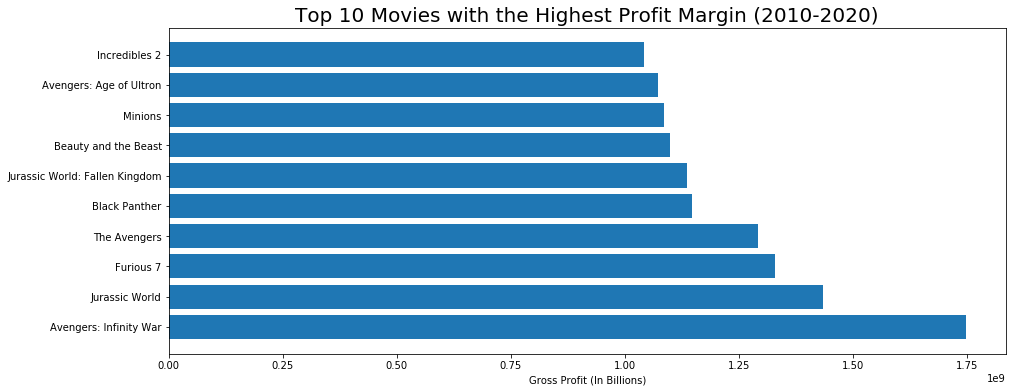

In [1377]:
plt.figure(figsize=(15,6))
plt.barh(top_10_grossprofit['original_title'],top_10_grossprofit['gross_profit'])

plt.title('Top 10 Movies with the Highest Profit Margin (2010-2020)',fontsize=20)
plt.xlabel('Gross Profit (In Billions)')

### Plotting Relationship between Vote Average and Profit Margin

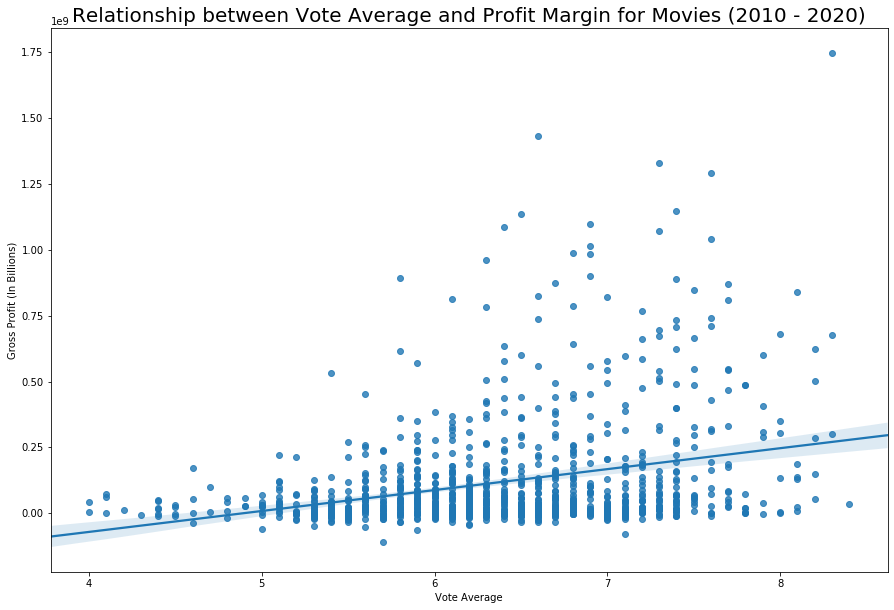

In [1378]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'black',
               'xtick.color':'black',
               'ytick.color':'black'})


plt.figure(figsize=(15,10))
ax = sns.regplot(x='vote_average',y='gross_profit',data=merged_data)
ax.set(xlabel='Vote Average', ylabel='Gross Profit (In Billions)')
plt.title('Relationship between Vote Average and Profit Margin for Movies (2010 - 2020)',fontsize=20)
plt.show()



In [1379]:
correlation = merged_data['vote_average'].corr(merged_data['gross_profit'])
correlation

0.2965503449562171

### Plotting Relationship between Popularity and Profit Margin

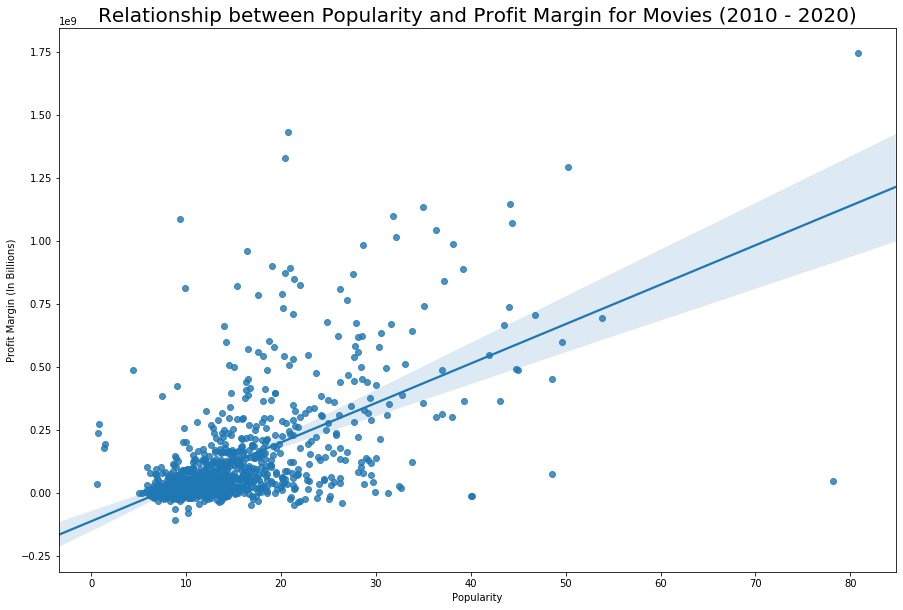

In [1380]:
sns.set_style({'grid.color':'black',
               'axes.facecolor':'white',
               'figure.facecolor':'white',
               'axes.edgecolor':'black',
               'axes.labelcolor':'black',
               'xtick.color':'black',
               'ytick.color':'black'})
plt.figure(figsize=(15,10))
ax = sns.regplot(x='popularity',y='gross_profit',data=merged_data)
ax.set(xlabel='Popularity', ylabel='Profit Margin (In Billions)')
plt.title('Relationship between Popularity and Profit Margin for Movies (2010 - 2020)',fontsize=20)
plt.show()

In [1381]:
correlation = merged_data['popularity'].corr(merged_data['gross_profit'])
correlation

0.5998378051823429

### Conclusion

All three relationships have positive relationships.

- Popularity and Vote Average (0.22)
- Vote Average and Profit Margin (0.30)
- Popularity and Profit Margin (0.60)

Popularity and Profit Margin had the highest correlation among the three relationships. As a movie's popularity increases, profit margin will increase which account for more than half of the movies in the past decade.